In [15]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

# Deep Neural Networks 
## Session 5

## Multi Layer
- Tanh Activation
- Sigmoid Function

<img src='../../prasami_images/prasami_color_tutorials_small.png' width='400' alt="By Pramod Sharma : pramod.sharma@prasami.com"/>

## Import Statements

In [16]:
###-----------------
### Import libraries
###-----------------
from pathlib import Path  # Import Path for file system path operations and management
import numpy as np  # Import NumPy for numerical computations and array operations
import pandas as pd  # Import Pandas for data manipulation and analysis with DataFrames
import matplotlib.pyplot as plt  # Import Matplotlib for creating static, interactive visualizations
import seaborn as sns  # Import Seaborn for statistical data visualization built on Matplotlib

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split  # Import function to split dataset into training and testing subsets
from sklearn.metrics import (accuracy_score, 
                             classification_report, 
                             confusion_matrix, 
                             ConfusionMatrixDisplay, 
                             f1_score)  # Import function to calculate various metric

In [17]:
###------------------
### Global Parameters
###------------------

# Directories
#inpDir = '../../input' 
inpDir = Path('..') / '..' / 'input'
# outDir = '../output'
outDir = Path('..') / 'output'


RANDOM_STATE = 42 
np.random.seed(RANDOM_STATE) # Set Random Seed for reproducible  results
rng = np.random.default_rng(seed=RANDOM_STATE)

TEST_SIZE  = 0.2 # Size of test data
NOISE = 0.2
EPOCHS =1 #20001
ALPHA = 0.1
N_SAMPLE = 1000

# Parameters for plotting
params = {'legend.fontsize': 'medium',
          'figure.figsize': (15, 6),
          'axes.labelsize': 'large',
          'axes.titlesize':'large',
          'xtick.labelsize':'medium',
          'ytick.labelsize':'medium'
         }

CMAP = plt.cm.coolwarm

plt.rcParams.update(params)

plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

In [18]:
def fn_plot_decision_boundary(X: np.ndarray, 
                              y: np.ndarray, 
                              model: dict, 
                              predict):
    
    # Initialize the figure with specified dimensions
    fig, ax = plt.subplots( figsize=(8, 5) )
    
    # Small increment value to create a fine grid for smooth decision boundary
    dm = 0.01
    padding = 2 * dm
    
    # Calculate the range for x-axis (first feature) with padding
    x_min, x_max = X[:, 0].min() - padding, X[:, 0].max() + padding
    
    # Calculate the range for y-axis (second feature) with padding  
    y_min, y_max = X[:, 1].min() - padding, X[:, 1].max() + padding
    
    # Create a mesh grid covering the entire feature space
    xx, yy = np.meshgrid(np.arange(x_min, x_max, dm),
                         np.arange(y_min, y_max, dm))
    
    # Flatten the mesh grid arrays and stack them column-wise to create coordinate pairs
    XX = np.c_[xx.ravel(), yy.ravel()] # Resulting shape: (n_points, 2)
    
    #####-----------------
    y_pred = predict(model, XX)
        
    # Reshape predictions to match the original mesh grid dimensions
    Z = np.array(y_pred).reshape(xx.shape)

    # Create filled contour plot showing the decision regions
    ax.contourf(xx, yy, Z, alpha=0.6, cmap=plt.cm.Paired)
    
    # Scatter plot of the actual data points, colored by their true class labels
    ax.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k', cmap=plt.cm.bwr)
    
    # Set plot title and axis labels
    ax.set_title('Decision Boundary')
    ax.set_xlabel('A')  
    ax.set_ylabel('B') 
    
    # Display the final plot
    plt.show()

In [19]:
X, y = make_moons(n_samples=N_SAMPLE, 
                  shuffle=True, 
                  noise=NOISE, 
                  random_state=RANDOM_STATE)
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

In [20]:
X[:5], y[:5]

(array([[-0.11166654,  0.52022374],
        [ 1.14264982, -0.34257734],
        [ 0.79555796, -0.01144231],
        [ 0.11182668, -0.55193153],
        [-0.81646618,  0.54399604]]),
 array([1, 1, 1, 1, 0]))

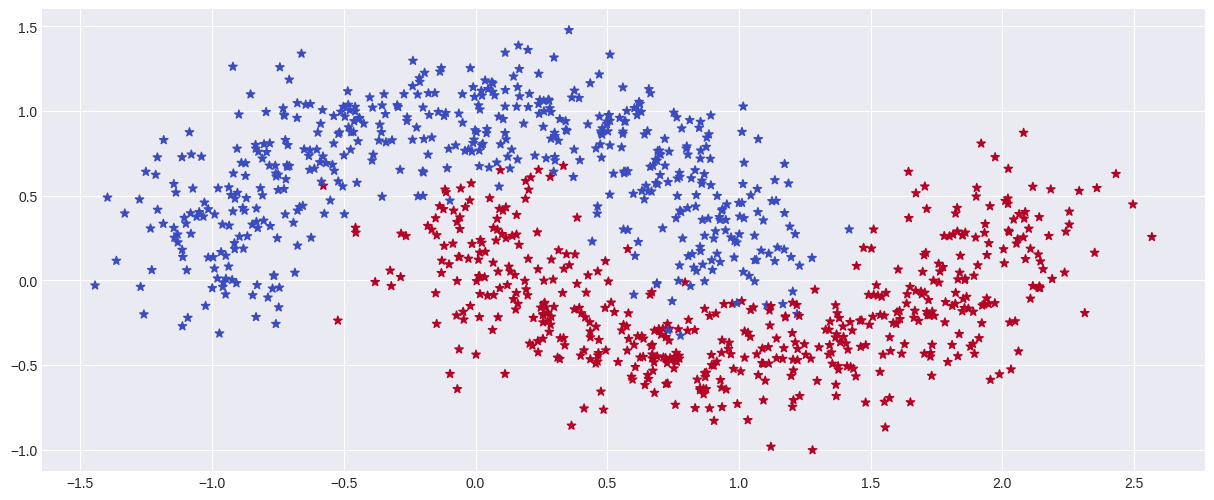

In [21]:
plt.scatter(X[:, 0], X[:, 1], s=40, c=y, marker='*', cmap=CMAP);

In [22]:
data_df = pd.DataFrame(X, columns =['A', 'B'])
data_df['target'] = y
data_df.head()

,A,B,target
0,-0.111667,0.520224,1
1,1.142650,-0.342577,1
2,0.795558,-0.011442,1
3,0.111827,-0.551932,1
4,-0.816466,0.543996,0


In [23]:
y = pd.get_dummies(y).to_numpy()

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

In [25]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [26]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800, 2), (200, 2))

In [27]:
def fn_softmax(z):
    exp_score = np.exp(z - np.max(z))
    return exp_score / np.sum(exp_score, axis=1, keepdims=True)

In [29]:
sm = fn_softmax(np.asarray([[-1.0, 0, 1.0], 
                            [-10, 0, -8]]))
sm.sum(axis=1)

array([1., 1.])

In [29]:
def fn_activ(z):
    return np.tanh(z)

def fn_activ_prime(z):
    return 1.0 - np.tanh(z)**2

In [30]:
fn_activ(np.asarray([[-1.0, 0, 1.0], [-np.inf, 0, np.inf]]))

array([[-0.76159416,  0.        ,  0.76159416],
       [-1.        ,  0.        ,  1.        ]])

In [ ]:
def predict(model, X):
    W1 = model['W1']
    W2 = model['W2']
    b1 = model['b1']
    b2 = model['b2']

    ## Forward Propagation
    z1 = X.dot(W1) + b1   # Aggregation
    a1 = fn_activ ( z1 )  # Activation

    z2 = a1.dot(W2) + b2   # Aggregation
    a2 = fn_softmax ( z2 )  # Activation
    return a2 >= 0.5
    

In [ ]:
def calculate_loss(model, X, y):
    W1 = model['W1']
    W2 = model['W2']
    b1 = model['b1']
    b2 = model['b2']
    m = X.shape[0]
    ## Forward Propagation
    z1 = X.dot(W1) + b1   # Aggregation
    a1 = fn_activ ( z1 )  # Activation

    z2 = a1.dot(W2) + b2   # Aggregation
    a2 = fn_softmax ( z2 )  # Activation
    data_loss = -(y * np.log(a2) + (1-y)* np.log(1-a2)).sum()
    return data_loss/m

In [ ]:
def build_model(param, X_tr, y_tr, X_ts, y_ts, alpha, n_epoch):
    m = X_tr.shape[0]
    nn_output_dim = y.shape[1]
    W1 = rng.random((param['h_dim'][0], param['h_dim'][1])) / np.sqrt(param['h_dim'][0])
    W2 = rng.random((param['h_dim'][1], param['h_dim'][2])) / np.sqrt(param['h_dim'][1])
    W3 = rng.random((param['h_dim'][2], param['h_dim'][3])) / np.sqrt(param['h_dim'][2])
    W4 = rng.random((param['h_dim'][3], param['h_dim'][4])) / np.sqrt(param['h_dim'][3])
    W5 = rng.random((param['h_dim'][4], param['h_dim'][5])) / np.sqrt(param['h_dim'][4])
    
    b1 = np.zeros((1, param['h_dim'][1]))
    b2 = np.zeros((1, param['h_dim'][2]))
    b3 = np.zeros((1, param['h_dim'][3]))
    b4 = np.zeros((1, param['h_dim'][4]))
    b5 = np.zeros((1, param['h_dim'][5]))
    
    loss, epoch = [], []

    for i in range(n_epoch):

        ## Forward Propagation
        z1 = X_tr.dot(W1) + b1   # Aggregation
        a1 = fn_activ ( z1 )  # Activation

        z2 = a1.dot(W2) + b2   # Aggregation
        a2 = fn_activ ( z2 )  # Activation

        z3 = a2.dot(W3) + b3   # Aggregation
        a3 = fn_activ ( z3 )  # Activation




        z2 = a1.dot(W2) + b2   # Aggregation
        a2 = fn_sigmoid ( z2 )  # Activation
        
        ## Back Propagation
        # Layer 2
        dz2 = a2 - y_tr
        assert (z2.shape == dz2.shape), f'Shape z2: {z2.shape}, {dz2.shape}'

        dW2 = (a1.T).dot(dz2)
        assert (W2.shape == dW2.shape), f'Shape W2: {W2.shape}, {dW2.shape}'
        db2 = np.sum(dz2, axis=0, keepdims=True)
        assert (b2.shape == db2.shape), f'Shape b2: {b2.shape}, {db2.shape}'
        da1 = dz2.dot(W2.T)
        assert (a1.shape == da1.shape), f'Shape a1: {a1.shape}, {da1.shape}'
        
        # Layer 1:
        dz1 = da1 * fn_activ_prime(z1)
        assert (z1.shape == dz1.shape), f'Shape z1: {z1.shape}, {dz1.shape}'
        dW1 = (X_tr.T).dot(dz1)
        assert (W1.shape == dW1.shape), f'Shape W1: {W1.shape}, {dW1.shape}'
        db1 = np.sum(dz1, axis=0, keepdims=True)
        assert (b1.shape == db1.shape), f'Shape b1: {b1.shape}, {db1.shape}'

        

        W1 = W1 - alpha * dW1 / m 
        b1 = b1 - alpha * db1 / m 
        W2 = W2 - alpha * dW2 / m 
        b2 = b2 - alpha * db2 / m 
        
        model = {'W1': W1, 'W2': W2, 'b1': b1, 'b2': b2}

        curr_loss = calculate_loss (model, X, y)
        epoch.append(i)
        loss.append(curr_loss)
        if i%1000 == 0:
            print (f'epoch - {i} : Loss - {curr_loss:.4f}')
    loss_hist['epoch'] = epoch
    loss_hist['loss'] = loss
    return model


In [34]:
loss_hist = {}
param = {}
param['h_dim'] = [X_train.shape[1], 5, 5, 4, 3, y_train.shape[1]]
# y_train = y_train.reshape(-1,1)
y_train.shape

(800, 2)

In [ ]:
model = build_model(param, 
                    X_train, 
                    y_train, 
                    X_test, 
                    y_test, 
                    alpha= ALPHA, 
                    n_epoch=EPOCHS)

epoch - 0 : Loss - 0.7093


In [19]:
loss_df = pd.DataFrame(loss_hist)
loss_df.head()

,epoch,loss
0,0,0.709287


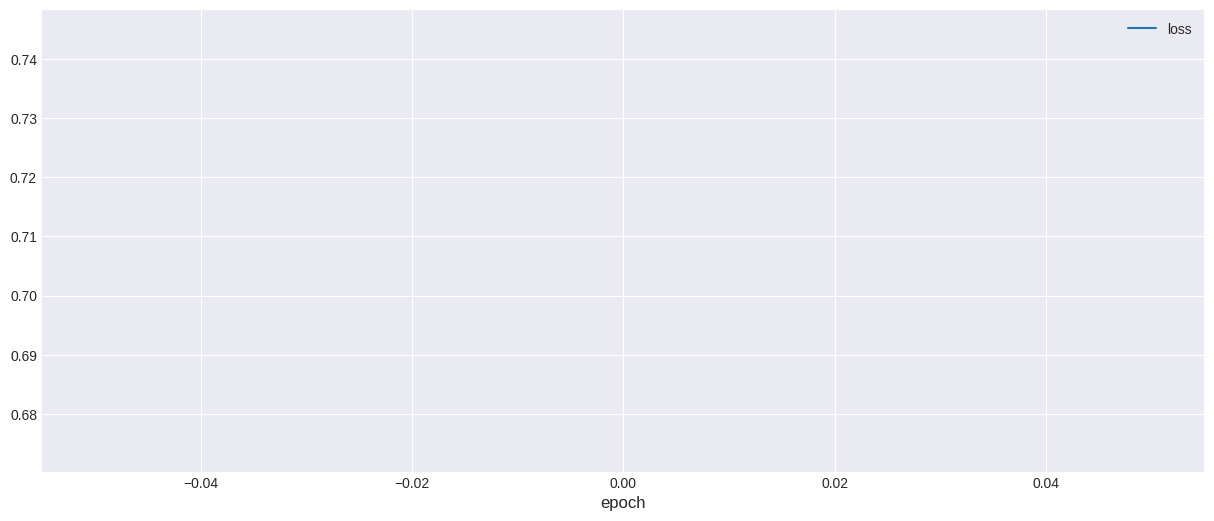

In [20]:
loss_df.plot(x = 'epoch', y='loss');

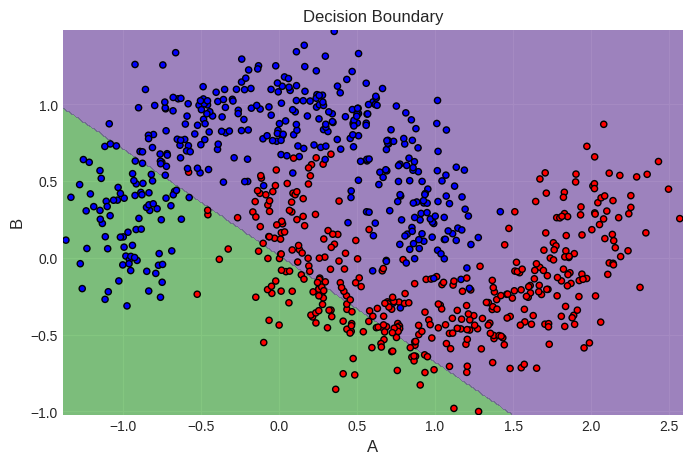

In [21]:
fn_plot_decision_boundary(X_train, y_train, model, predict)